In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df=pd.read_csv('../dataset/drug200.csv')

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
X=df.drop(columns='Drug')

In [6]:
Y=df['Drug']

In [7]:
encode=LabelEncoder()

In [8]:
Y=encode.fit_transform(Y)

In [9]:
Catgorigal_data=X.select_dtypes(['object']).columns
numerical_data=X.select_dtypes(['number']).columns

In [10]:
Preprocess=ColumnTransformer(transformers=[('transform',OneHotEncoder(),Catgorigal_data),('scale',StandardScaler(),numerical_data)])

In [11]:
tranform=Pipeline([('preprocess',Preprocess),('pca',PCA(n_components=2))])

In [12]:
X_pca=tranform.fit_transform(X)

In [13]:
X_pca

array([[ 1.94775586,  0.02066617],
       [-0.61820491, -0.06806551],
       [-0.90555614, -0.35466758],
       [-0.11150334, -1.52770572],
       [-0.45486829,  1.03359401],
       [ 0.21375934, -1.70795244],
       [-0.15911663,  0.19111998],
       [-0.56929714, -0.52394664],
       [-0.9815862 ,  0.53480173],
       [ 0.2561606 ,  0.28566564],
       [-0.48338079, -0.1723874 ],
       [ 1.00497167, -0.17636138],
       [-0.23317087, -0.02047623],
       [-0.71089311,  1.87166969],
       [-0.54487257, -0.10952002],
       [ 1.39139549, -1.30492918],
       [-1.57843775,  0.64271633],
       [-0.23705637, -0.23745086],
       [-0.18827502, -1.65790206],
       [ 1.7408902 ,  0.38941807],
       [-0.34385344,  0.86475915],
       [-0.06865198,  1.69768652],
       [ 1.17168262,  1.53524171],
       [-0.20926104,  0.18512793],
       [ 2.1884751 ,  1.3149594 ],
       [ 1.21458006, -0.47196085],
       [ 1.83874647,  0.82361733],
       [-0.71983732, -0.5500527 ],
       [ 1.0048194 ,

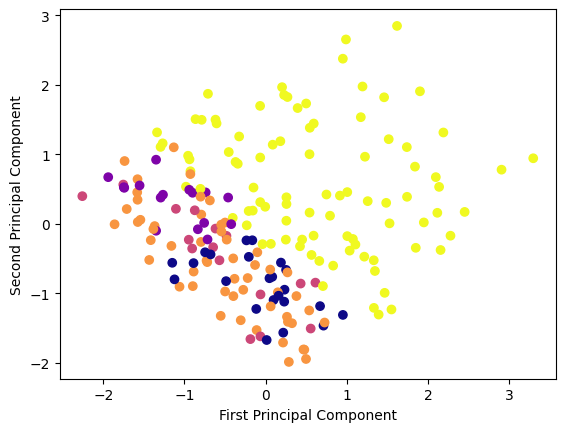

In [14]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
			c=Y,
			cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [15]:
pca_components=tranform.named_steps['pca'].components_.T 

In [16]:
pca_components

array([[ 0.13136435,  0.01162461],
       [-0.13136435, -0.01162461],
       [ 0.09708313, -0.00252553],
       [-0.03445973,  0.07937381],
       [-0.0626234 , -0.07684828],
       [-0.05213366,  0.03895918],
       [ 0.05213366, -0.03895918],
       [-0.67999488,  0.70984087],
       [ 0.69507097,  0.69325883]])

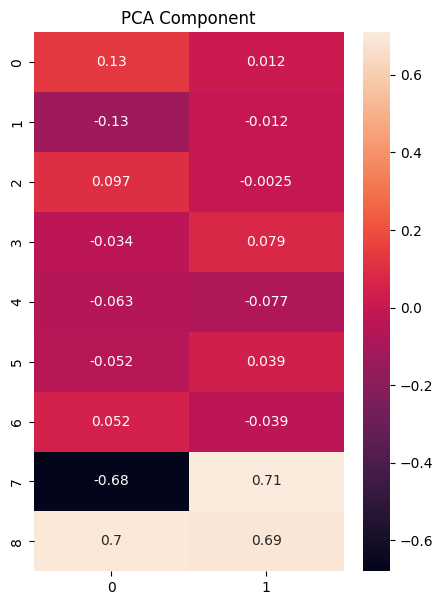

In [17]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_components,annot=True)
plt.title('PCA Component')
plt.show()